# ML2 - Session 4 - Class Activity

## Activity - Part 1 

## The IT team at a local hospital wants to install a smart camera that can detect if someone is wearing a facemask as part of the healthcare procedures. To do that they want to collect data and devalop a program that can detect a human face and predict if a face is with mask, without mask, or with mask weared incorrectly. 
<img style="float: center; /"  width = "1000"  src="Notebook Images/ML-M2-Session4-ClassActivity-Image.png">

## Your task is to apply augmentation techniques on the facemask dataset.
## What you need to do:
1. Load the facemask dataset.
2. Add augmentations on the data.


### 1. Load the facemask dataset

1.1 Load the facemask dataset using the __*load(filename)*__ function. filename = "facemask"

In [1]:
data = load("facemask")

### 2. Add the augmentations on the data

2.1 Add the augmentations on the data.<br>
You can use from the following functions to augment your data:<br><br>
__*add_rotate_image(data)<br>
add_zoom_image(data)<br>
add_random_brightness_image(data)*__

In [2]:
add_rotate_image(data)
add_random_brightness_image(data)

2.2 Apply the augmentations you added previously using the function __*apply_augmentations(data, number_of_copies)*__. Determine how many copies you want to add to the dataset.

In [3]:
apply_augmentations(data, 2)

2.3 Show the augmented data

Showing the first 10 rows


Image,ClassName
,without_mask
,without_mask
,without_mask
,without_mask
,without_mask
,without_mask
,without_mask
,without_mask
,without_mask
,without_mask

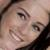
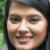
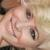
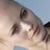
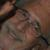
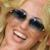
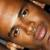
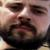
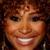
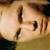

In [4]:
show_augmented(data)

## Activity - Part 2

## Your next task is to create a detect facemask function in order to detect a face in an image and predict if the face has a mask, no mask, or inncorrect mask postion.
##  What you need to do:
3. Define a function detectFacemask(img)
5. Call the function and show the image

### 3. Define a function _detectFacemask(img)_

3.1 Load the model trained on the facemask dataset. Use the function __*load_pretrained_model(model_name)*__. The model name is "facemask".

In [5]:
model = load_pretrained_model("facemask")

3.2 Define a function __*detectFacemask(img)*__ that takes an image, detects the contours of the image and then predects each bounding box

In [6]:
def detectFacemask(img):
    # Get the contours of the image
    contours = find_contours(img) 
    # For each contour, get the rectangle
    rects = get_boundingbox(img, contours)
    for rect in rects:
        size = max(rect[2], rect[3])
        x1 = rect[0]
        y1 = rect[1]
        x2 =  x1 + rect[2]
        y2 =  y1 + rect[3]
        # Crop the image at each contour
        crop_img = crop_image(img, x1, y1, x2, y2)
       
        # Predict the cropped image using the given model
        result = predict_face(model, crop_img)
        # If the result predicts a sign, then draw a square at the contour and label it
        if result[1] > 0.90:
            draw_rectangle(img, x1, y1, x2, y2)
            put_text(img, x1, y2+30, str(result[0]))
            put_text(img, x1, y1-20,str(result[1] * 100))
    
    # return the image   
    return img

### 4. Call the function and show image

4.1 Read the image from file into a variable using the function __*read_image(filename)*__. Use the sample image: "facemask_5.png". ex: image = read_image("sample.png")

In [7]:
image = read_image("facemask_7.jpg")

4.2 Call the detectFacemask function on the output you got from the previous function

In [8]:
img = detectFacemask(image)

4.3 Show the annotated image using the __*show_annotated_image(img)*__ function. ex: show_annotated_image(image)

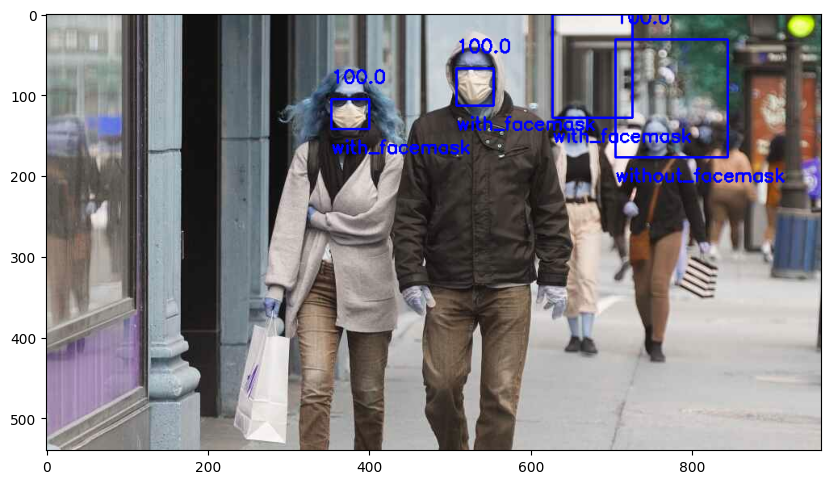

In [9]:
show_annotated_image(img)